**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Oscar Ramirez Anaya
*   MATRÍCULA: A01795438

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
#os.chdir(DIR)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas? 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Determina el porcentaje de valores faltantes por columna.

In [29]:
cantidad = len(df)
miss_values_count = df.isnull().sum(min_count=1)
index = 0 
for item  in miss_values_count:
    columna = df.columns[index]
    porcentaje = round(item / (cantidad / 100) , 2)
    print(f'Porcentaje de valores faltantes en {columna} : {porcentaje}%')
    index = index +1 
#miss_values_count = miss_values_count[miss_values_count != 0]
#miss_values_count.head()

Porcentaje de valores faltantes en person_age : 0.0%
Porcentaje de valores faltantes en person_income : 0.0%
Porcentaje de valores faltantes en person_home_ownership : 0.0%
Porcentaje de valores faltantes en person_emp_length : 2.75%
Porcentaje de valores faltantes en loan_intent : 0.0%
Porcentaje de valores faltantes en loan_grade : 0.0%
Porcentaje de valores faltantes en loan_amnt : 0.0%
Porcentaje de valores faltantes en loan_int_rate : 9.56%
Porcentaje de valores faltantes en loan_status : 0.0%
Porcentaje de valores faltantes en loan_percent_income : 0.0%
Porcentaje de valores faltantes en cb_person_default_on_file : 0.0%
Porcentaje de valores faltantes en cb_person_cred_hist_length : 0.0%


## Preparo los datos para trabajar sustituyendo los valores nulos

In [30]:
df['person_emp_length'] = df['person_emp_length'].fillna(0)
df['loan_int_rate'] = df['loan_int_rate'].fillna(0)

# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis 
   
**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%) 

#### Descripción

In [47]:
bufer = []
for item in df.columns:
    if np.issubdtype(df[item].dtype, np.number) == True :
        media = round(df[item].mean(),2 ) 
        mediana = df[item].median()
        min = df[item].min()
        max = df[item].max()
        std = round(df[item].std(),2)
        quantile_25 = df[item].quantile(.25)
        quantile_50 = df[item].quantile(.50)
        quantile_75 = df[item].quantile(.75)
        asimetria  = df[item].skew()
        curtosis = df[item].kurt()
        raw = {}
        raw['columna'] = item
        raw['media'] = media
        raw['mediana'] = mediana
        raw['min'] = min
        raw['max'] = max
        raw['std'] = std
        raw['quantile_25'] = quantile_25
        raw['quantile_50'] = quantile_50
        raw['quantile_75'] = quantile_75
        raw['asimetria'] = asimetria
        raw['curtosis'] = curtosis
        bufer.append(raw)
df_ed = pd.DataFrame(bufer)
df_ed


,columna,media,mediana,min,max,std,quantile_25,quantile_50,quantile_75,asimetria,curtosis
0,person_age,27.73,26.00,20.0,144.00,6.35,23.00,26.00,30.00,2.581393,18.560825
1,person_income,66074.85,55000.00,4000.0,6000000.00,61983.12,38500.00,55000.00,79200.00,32.865349,2693.272776
2,person_emp_length,4.66,4.00,0.0,123.00,4.16,2.00,4.00,7.00,2.564500,42.065455
3,loan_amnt,9589.37,8000.00,500.0,35000.00,6322.09,5000.00,8000.00,12200.00,1.192477,1.423565
4,loan_int_rate,9.96,10.62,0.0,23.22,4.47,7.49,10.62,13.11,-0.637851,0.165644
5,loan_status,0.22,0.00,0.0,1.00,0.41,0.00,0.00,0.00,1.364888,-0.137088
6,loan_percent_income,0.17,0.15,0.0,0.83,0.11,0.09,0.15,0.23,1.064669,1.223687
7,cb_person_cred_hist_length,5.80,4.00,2.0,30.00,4.06,3.00,4.00,8.00,1.661790,3.716194


### Clasificacion

In [50]:
#obtengo creo un df con solo esos campos
df_clasificacion = df[['person_age','loan_int_rate']]
df_clasificacion.describe()

,person_age,loan_int_rate
count,32581.000000,32581.000000
mean,27.734600,9.958552
std,6.348078,4.470390
min,20.000000,0.000000
25%,23.000000,7.490000
50%,26.000000,10.620000
75%,30.000000,13.110000
max,144.000000,23.220000


In [56]:
#comparamos la media y mediana de cada caso
buffer = []
for item in df_clasificacion.columns:
    raw = {}
    raw['columna'] = item
    raw['media'] = df[item].mean()
    raw['mediana'] = df[item].median()
    raw['distribucion_frecuencia_num'] = raw['media'] - raw['mediana']
    if raw['media']  == raw['mediana'] :
        raw['distribucion_frecuencia'] = 'simetrica'
    elif raw['media'] < raw['mediana']:
        raw['distribucion_frecuencia'] = 'asimetria hacia la izquierda'
    elif raw['media'] > raw['mediana']:
        raw['distribucion_frecuencia'] = 'asimetria hacia la derecha'
    buffer.append(raw)
df_result = pd.DataFrame(buffer)
df_result

,columna,media,mediana,distribucion_frecuencia_num,distribucion_frecuencia
0,person_age,27.734600,26.00,1.734600,asimetria hacia la derecha
1,loan_int_rate,9.958552,10.62,-0.661448,asimetria hacia la izquierda


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable. 
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.
 
**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma. 

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>]], dtype=object)

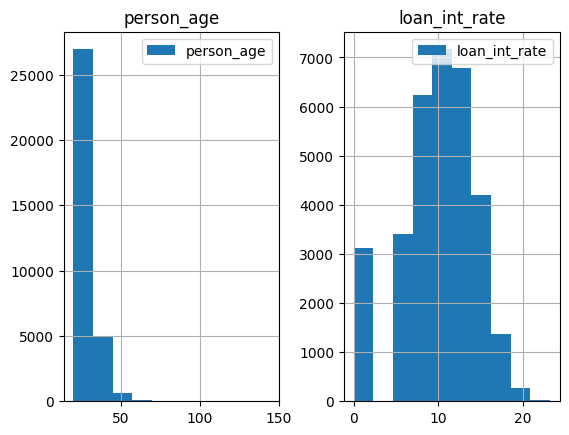

In [60]:
df_clasificacion.hist(legend =True)

<AxesSubplot:ylabel='Density'>

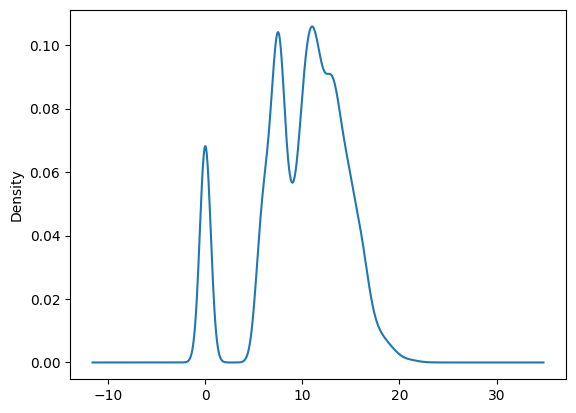

In [63]:
df_clasificacion['loan_int_rate'].plot.kde()

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles. 

<AxesSubplot:>

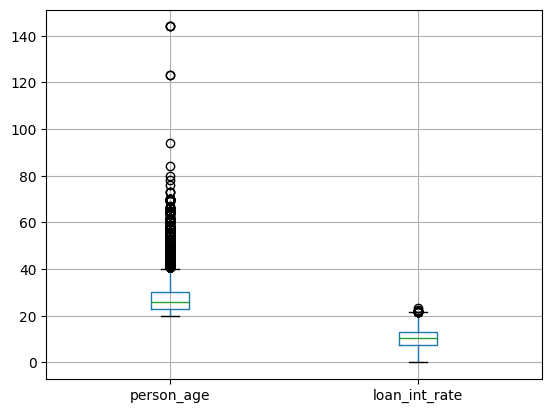

In [129]:
df_clasificacion.boxplot()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [66]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,0.00,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables categóricas

 6. Obtén las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)
   
**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos utiliza la función `df["columna"].value_counts()` 

In [92]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [93]:
bufer = []
for item in df.columns:
    if np.issubdtype(df[item].dtype, np.number) == False :
        raw = {}
        raw['columna'] = item
        raw['tendencia'] = df[item].mode().values[0]
        raw['cantidad_valores_unicos'] = len(df[item].unique())
        #valores unicos
        unicos  = []
        for u in df[item].unique():
            unicos.append({'valor' :  u
                           ,'cantidad' : len(df[df[item] == u]) })
        raw['valores'] = unicos

        bufer.append(raw)

df_categorias = pd.DataFrame(bufer)
df_categorias

,columna,tendencia,cantidad_valores_unicos,valores
0,person_home_ownership,RENT,4,"[{'valor': 'RENT', 'cantidad': 16446}, {'valor..."
1,loan_intent,EDUCATION,6,"[{'valor': 'PERSONAL', 'cantidad': 5521}, {'va..."
2,loan_grade,A,7,"[{'valor': 'D', 'cantidad': 3626}, {'valor': '..."
3,cb_person_default_on_file,N,2,"[{'valor': 'Y', 'cantidad': 5745}, {'valor': '..."


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x="columna", data=df) `

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

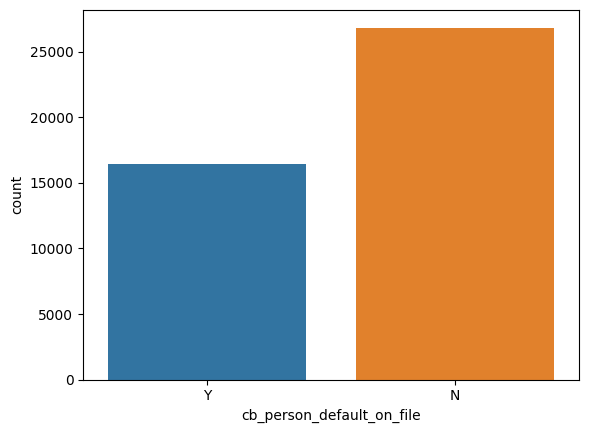

In [96]:
sns.countplot(x='person_home_ownership', data=df )

<AxesSubplot:xlabel='loan_intent', ylabel='count'>

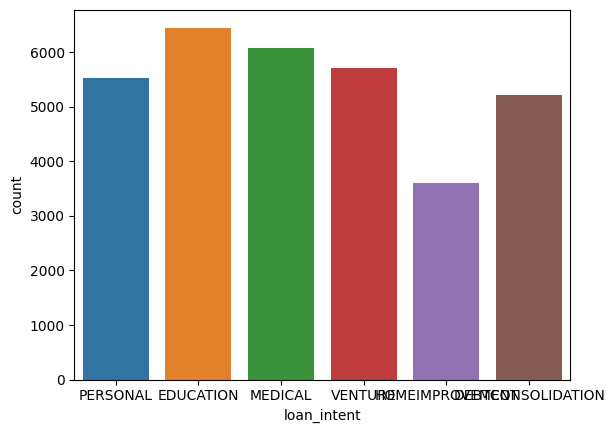

In [97]:
sns.countplot(x='loan_intent', data=df )


<AxesSubplot:xlabel='loan_grade', ylabel='count'>

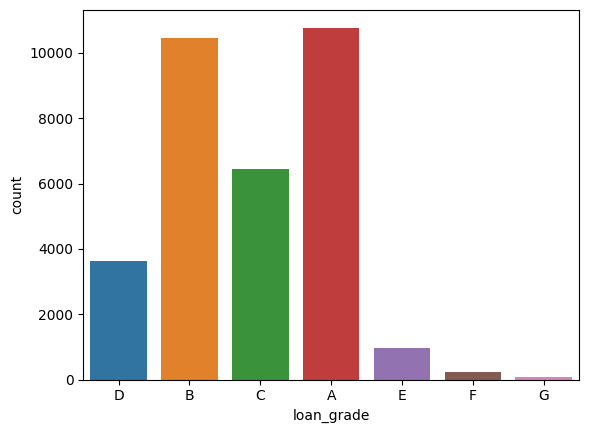

In [98]:
sns.countplot(x='loan_grade', data=df )

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

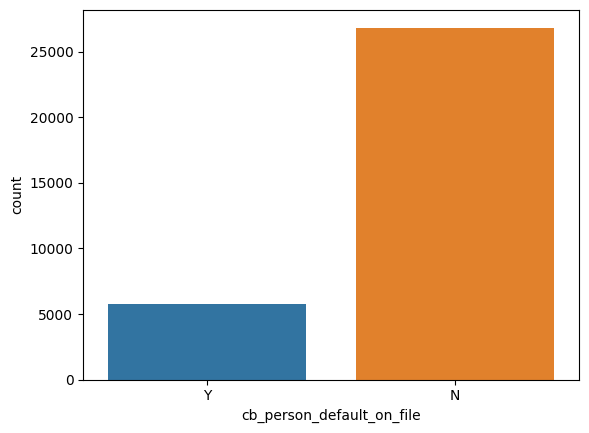

In [99]:
sns.countplot(x='cb_person_default_on_file', data=df )

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos: 

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `load_status`. Interpreta el resultado.	

<AxesSubplot:title={'center':'loan_percent_income'}, xlabel='loan_status'>

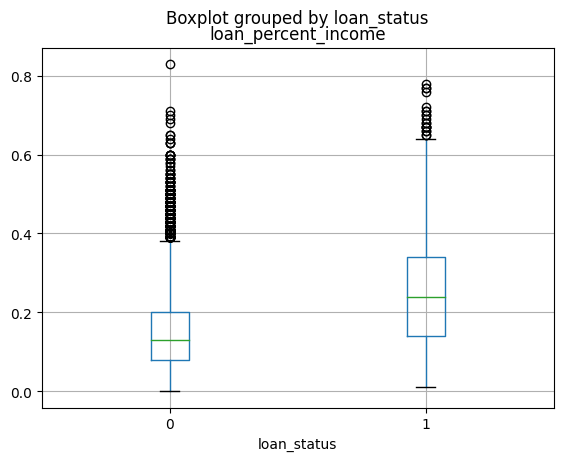

In [128]:
df.boxplot(column='loan_percent_income', by='loan_status')

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

<AxesSubplot:xlabel='person_home_ownership', ylabel='count'>

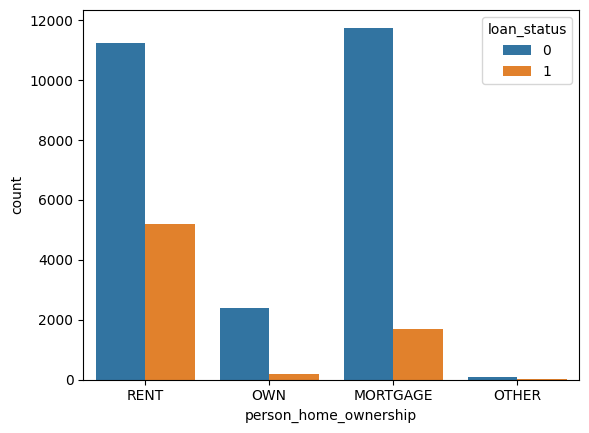

In [130]:
sns.countplot(x='person_home_ownership', data=df , hue='loan_status')

<AxesSubplot:xlabel='loan_intent', ylabel='count'>

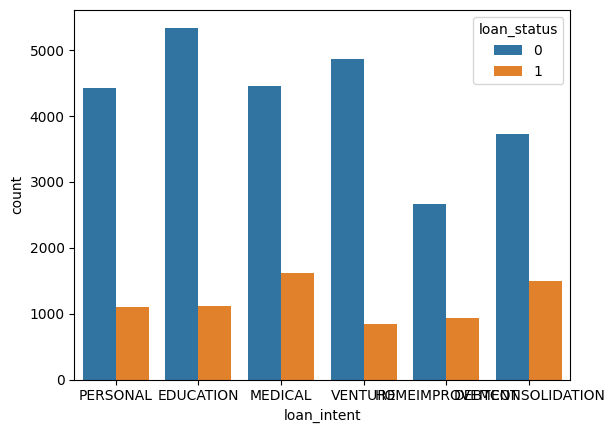

In [131]:
sns.countplot(x='loan_intent', data=df , hue='loan_status' )

<AxesSubplot:xlabel='loan_grade', ylabel='count'>

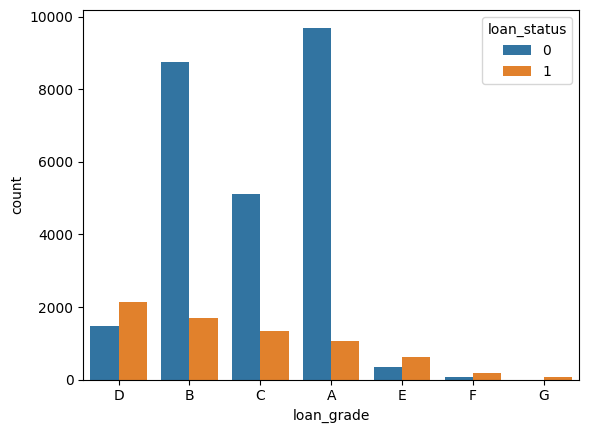

In [132]:
sns.countplot(x='loan_grade', data=df , hue='loan_status' )

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

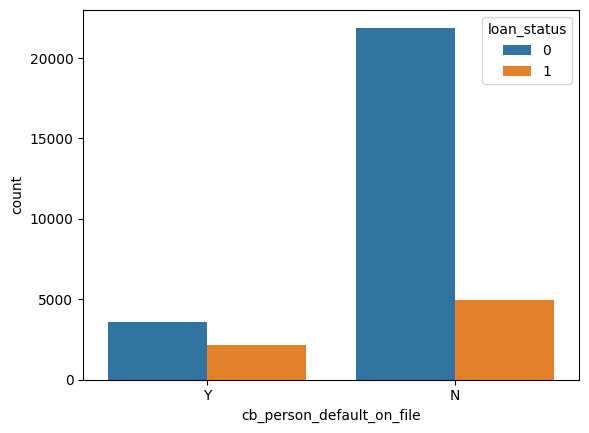

In [133]:
sns.countplot(x='cb_person_default_on_file', data=df , hue='loan_status' )

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<AxesSubplot:>

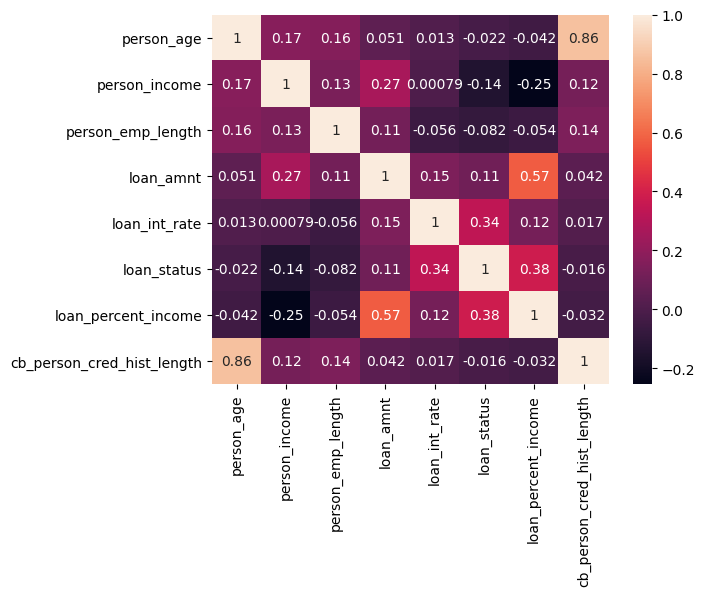

In [137]:
correlacion = df.corr()
sns.heatmap(data=correlacion , annot=True)

## El campo con mayor correlacion es loan_percent_income